## Importações e Carregamento dos Dados

In [ ]:
%pip install -q numpy -q scikit-learn -q matplotlib -q seaborn -q shap

Neste bloco, importamos todas as bibliotecas necessárias e carregamos os dados de treino e teste. Também exibimos informações básicas sobre o dataset de treino.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from utils.functions import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
try:
    df = pd.read_parquet('data/train.parquet')
    test = pd.read_parquet('data/test.parquet')
except FileNotFoundError:
    print("Erro: Arquivos de dados não encontrados. Verifique se os arquivos estão no diretório correto.")
    exit()

print("Informações do Dataset:")
print(df.info())

## Criação de Amostra e Análise Inicial

Aqui, criamos uma amostra com 10% dos dados de cada classe para análises iniciais. Exibimos a distribuição das classes na amostra e criamos uma matriz de correlação para visualizar as relações entre as variáveis.


Tamanho da amostra: 15204
Distribuição das classes na amostra:
y
1    0.856222
0    0.143778
Name: proportion, dtype: float64


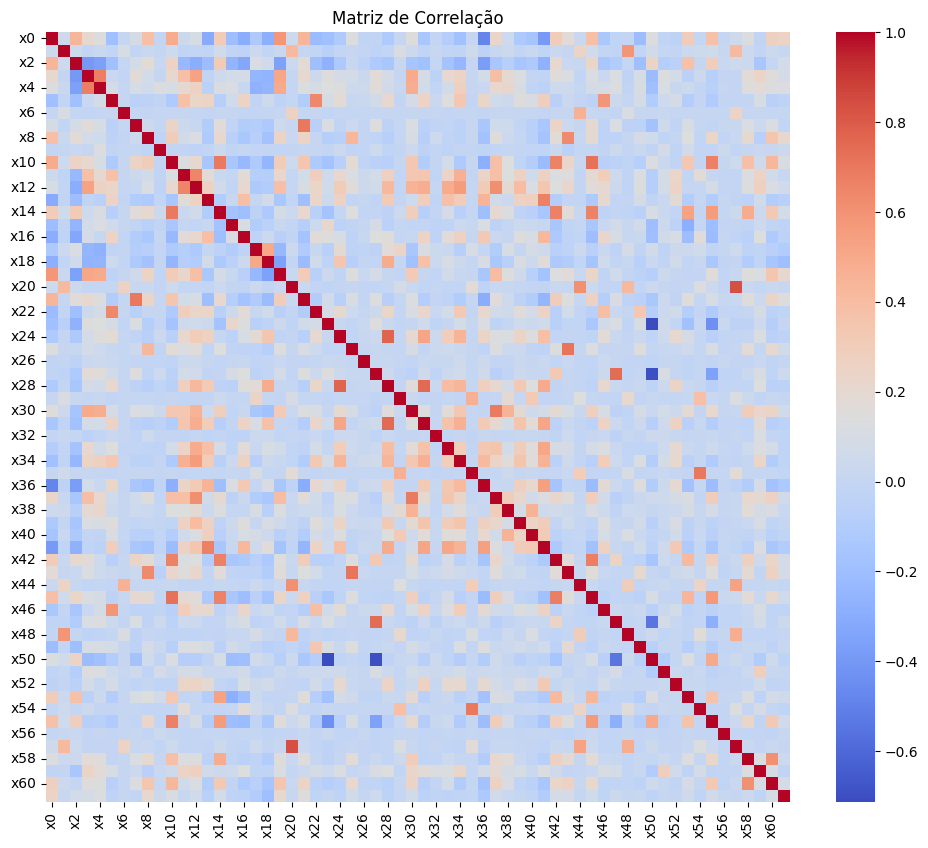

In [8]:
amostra = criar_amostra(df)

print("\nTamanho da amostra:", len(amostra))
print("Distribuição das classes na amostra:")
print(amostra['y'].value_counts(normalize=True))

corr_matrix = amostra.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()
plt.close()

In [9]:
estrategias = ['media', 'mediana', 'moda', 'constante']
dfs_tratados = {estrategia: tratar_nulos(amostra, estrategia) for estrategia in estrategias}

for estrategia, df_tratado in dfs_tratados.items():
    print(f"\nEstatísticas após tratamento com {estrategia}:")
    print(df_tratado.describe())


Estatísticas após tratamento com media:
                 x0            x1            x2            x3            x4  \
count  15204.000000  1.520400e+04  15204.000000  15204.000000  15204.000000   
mean       0.654633  1.020376e-03      0.196767      0.067404      0.162838   
std        0.252524  8.659575e-03      0.193639      0.053095      0.120260   
min        0.000000  0.000000e+00      0.000000      0.000000      0.000000   
25%        0.500000  2.400200e-07      0.042753      0.047619      0.070494   
50%        0.700000  4.999556e-07      0.125935      0.067404      0.138081   
75%        0.833333  1.107285e-06      0.298473      0.067404      0.225291   
max        1.000000  7.197661e-01      0.964639      0.702881      0.965116   

                 x5            x6            x7            x8            x9  \
count  15204.000000  1.520400e+04  15204.000000  15204.000000  15204.000000   
mean       0.007414  2.201997e-04      0.726852      0.579072      0.328267   
std       

In [10]:
dados_preparados = {}
for estrategia, df_tratado in dfs_tratados.items():
    dados_preparados[estrategia] = preparar_dados(df_tratado, aplicar_pca=False)
    dados_preparados[f"{estrategia}_pca"] = preparar_dados(df_tratado, aplicar_pca=True)

for nome, dados in dados_preparados.items():
    X_train, X_test, y_train, y_test = dados
    print(f"\nEstatísticas para {nome}:")
    print(f"Forma de X_train: {X_train.shape}")
    print(f"Forma de X_test: {X_test.shape}")
    print(f"Distribuição de classes em y_train: {np.bincount(y_train)}")
    print(f"Distribuição de classes em y_test: {np.bincount(y_test)}")

Número de componentes PCA: 46
Número de componentes PCA: 46
Número de componentes PCA: 46
Número de componentes PCA: 45

Estatísticas para media:
Forma de X_train: (20828, 61)
Forma de X_test: (3041, 61)
Distribuição de classes em y_train: [10414 10414]
Distribuição de classes em y_test: [ 437 2604]

Estatísticas para media_pca:
Forma de X_train: (20828, 46)
Forma de X_test: (3041, 46)
Distribuição de classes em y_train: [10414 10414]
Distribuição de classes em y_test: [ 437 2604]

Estatísticas para mediana:
Forma de X_train: (20828, 61)
Forma de X_test: (3041, 61)
Distribuição de classes em y_train: [10414 10414]
Distribuição de classes em y_test: [ 437 2604]

Estatísticas para mediana_pca:
Forma de X_train: (20828, 46)
Forma de X_test: (3041, 46)
Distribuição de classes em y_train: [10414 10414]
Distribuição de classes em y_test: [ 437 2604]

Estatísticas para moda:
Forma de X_train: (20828, 61)
Forma de X_test: (3041, 61)
Distribuição de classes em y_train: [10414 10414]
Distribuiçã


Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Avaliação do Random Forest (Estratégia de preparação: media):
Acurácia: 0.8550
Precisão: 0.8864
Recall: 0.9528
F1-Score: 0.9184
AUC-ROC: 0.7485


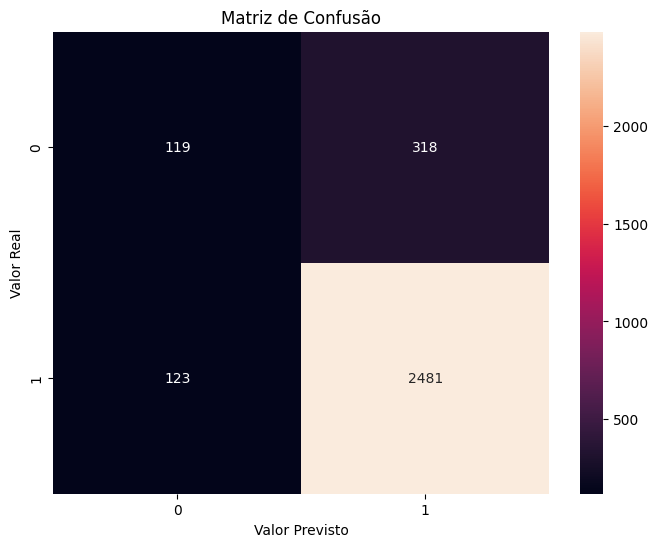


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Avaliação do XGBoost (Estratégia de preparação: media):
Acurácia: 0.8510
Precisão: 0.8845
Recall: 0.9501
F1-Score: 0.9161
AUC-ROC: 0.7188


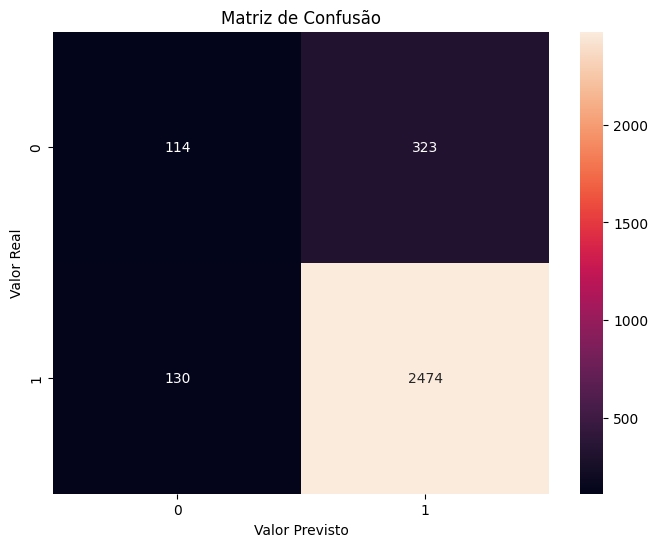


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15547
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Melhores parâmetros para LightGBM: {'num_leaves': 50, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.1}
Avaliação do LightGBM (Estratégia de preparação: media):
Acurácia: 0.8596
Precisão: 0.8834
Recall: 0.9631
F1-Score: 0.9216
AUC-ROC: 0.7402


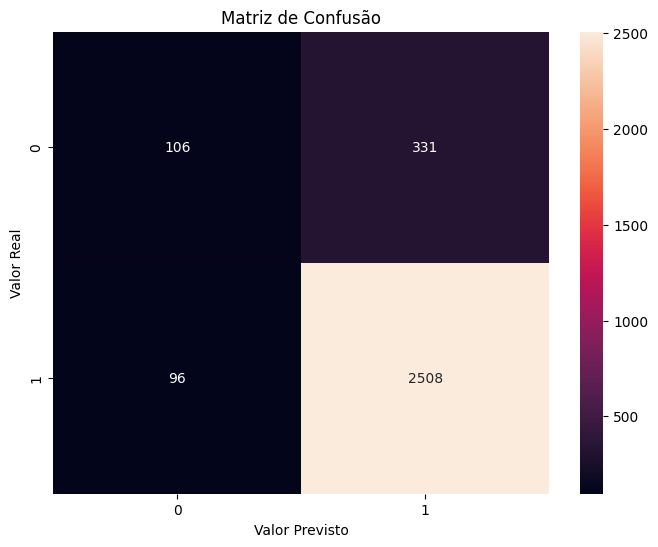


Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Avaliação do Random Forest (Estratégia de preparação: media_pca):
Acurácia: 0.8336
Precisão: 0.8854
Recall: 0.9255
F1-Score: 0.9050
AUC-ROC: 0.7213


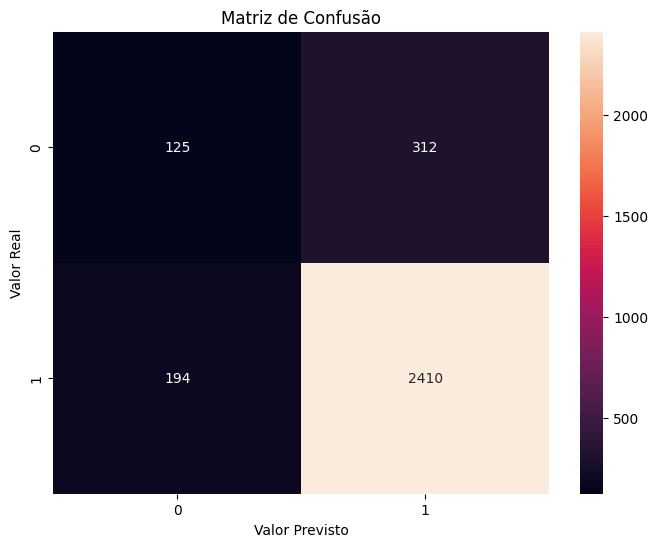


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Avaliação do XGBoost (Estratégia de preparação: media_pca):
Acurácia: 0.8043
Precisão: 0.8874
Recall: 0.8836
F1-Score: 0.8855
AUC-ROC: 0.6943


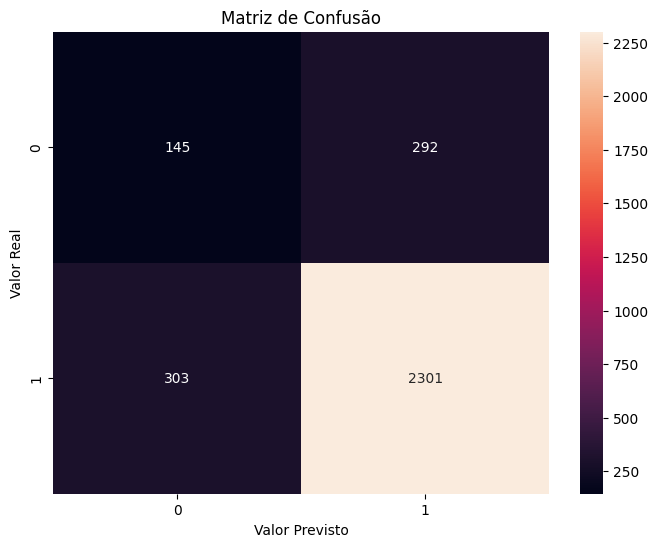


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11730
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

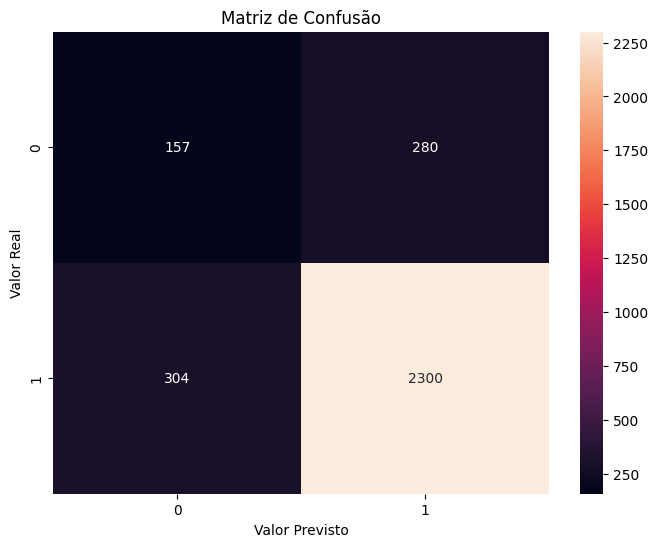


Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Avaliação do Random Forest (Estratégia de preparação: mediana):
Acurácia: 0.8563
Precisão: 0.8913
Recall: 0.9478
F1-Score: 0.9187
AUC-ROC: 0.7490


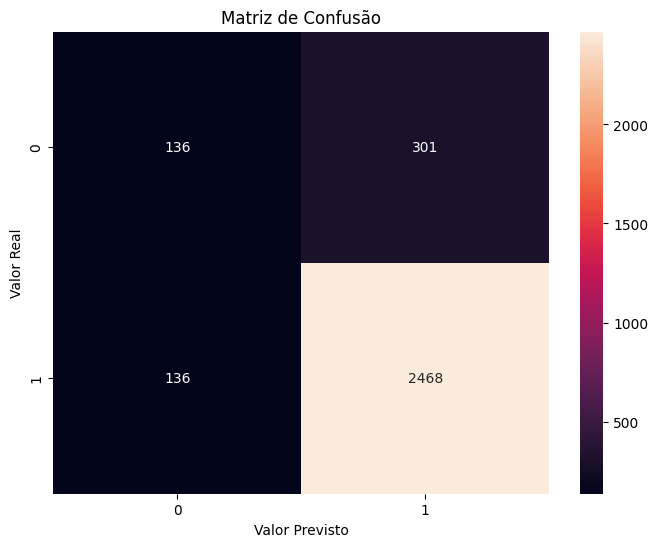


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Avaliação do XGBoost (Estratégia de preparação: mediana):
Acurácia: 0.8520
Precisão: 0.8866
Recall: 0.9485
F1-Score: 0.9165
AUC-ROC: 0.7265


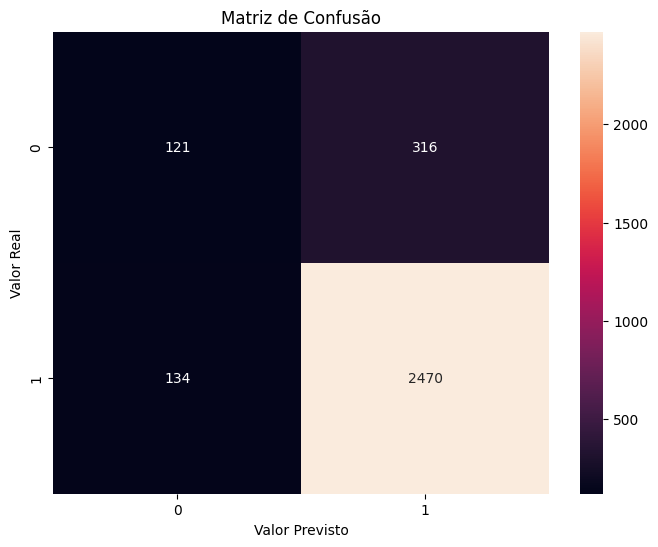


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15549
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

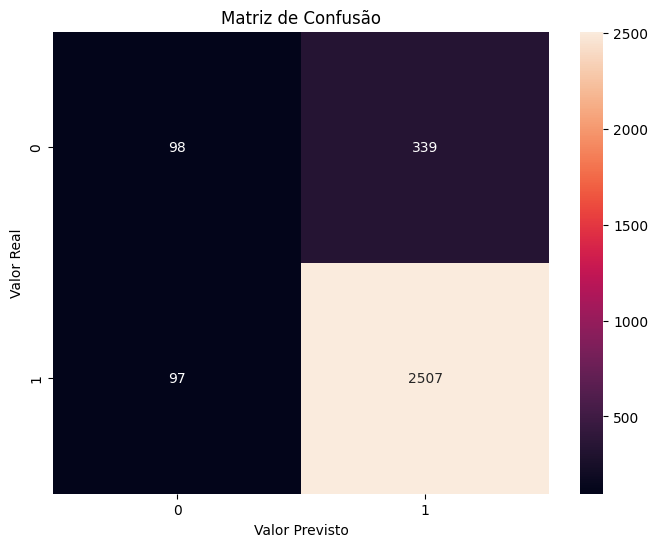


Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Avaliação do Random Forest (Estratégia de preparação: mediana_pca):
Acurácia: 0.8329
Precisão: 0.8836
Recall: 0.9270
F1-Score: 0.9048
AUC-ROC: 0.7111


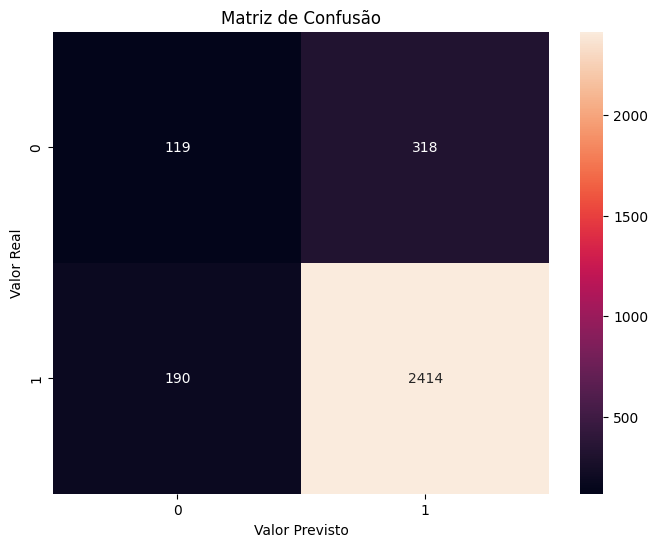


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Avaliação do XGBoost (Estratégia de preparação: mediana_pca):
Acurácia: 0.8096
Precisão: 0.8875
Recall: 0.8906
F1-Score: 0.8890
AUC-ROC: 0.6876


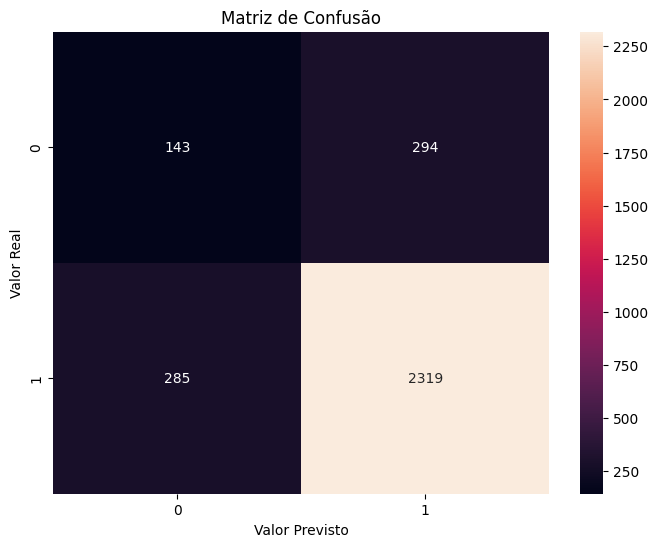


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11730
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

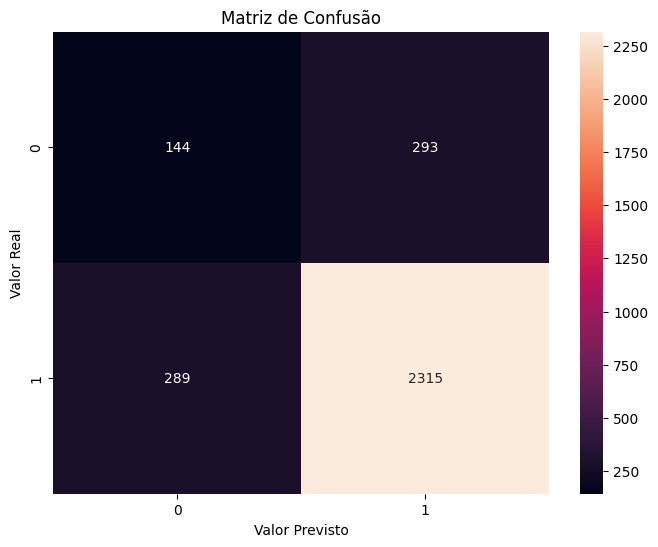


Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Avaliação do Random Forest (Estratégia de preparação: moda):
Acurácia: 0.8520
Precisão: 0.8939
Recall: 0.9386
F1-Score: 0.9157
AUC-ROC: 0.7666


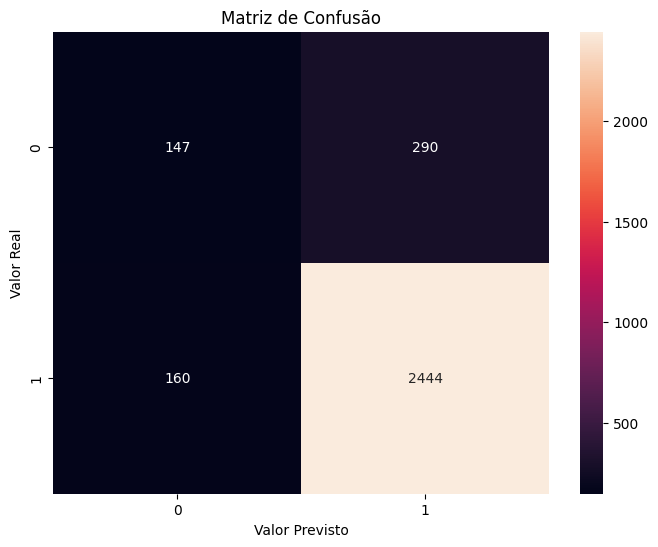


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Avaliação do XGBoost (Estratégia de preparação: moda):
Acurácia: 0.8556
Precisão: 0.8898
Recall: 0.9489
F1-Score: 0.9184
AUC-ROC: 0.7369


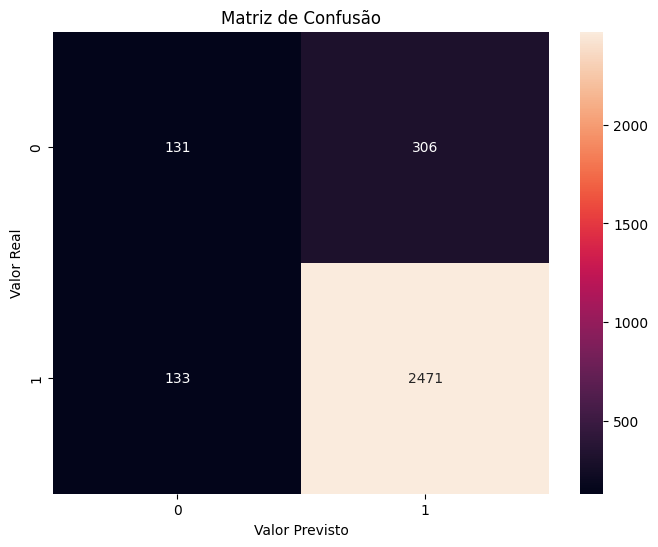


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15551
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

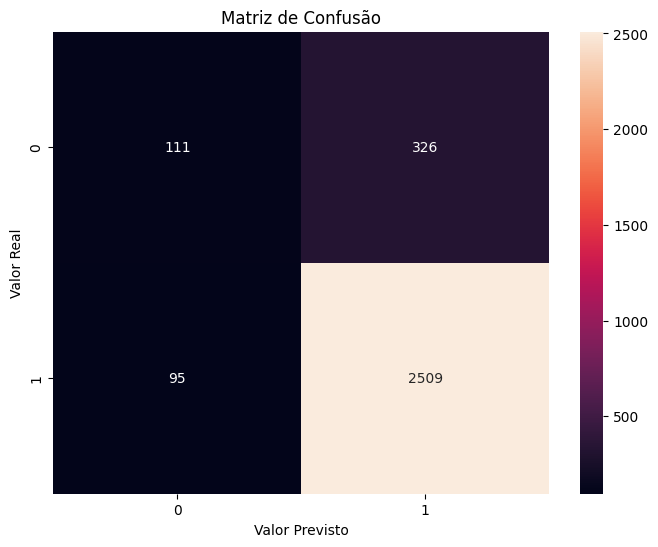


Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Avaliação do Random Forest (Estratégia de preparação: moda_pca):
Acurácia: 0.8339
Precisão: 0.8891
Recall: 0.9209
F1-Score: 0.9047
AUC-ROC: 0.7160


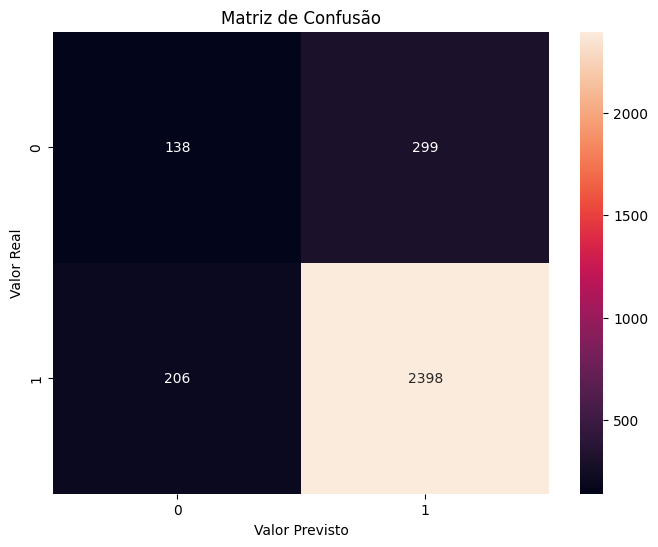


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Avaliação do XGBoost (Estratégia de preparação: moda_pca):
Acurácia: 0.8083
Precisão: 0.8891
Recall: 0.8867
F1-Score: 0.8879
AUC-ROC: 0.6735


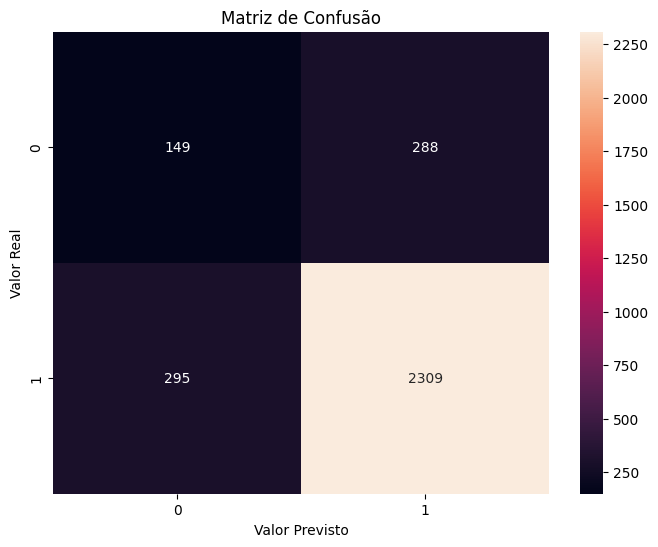


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11730
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

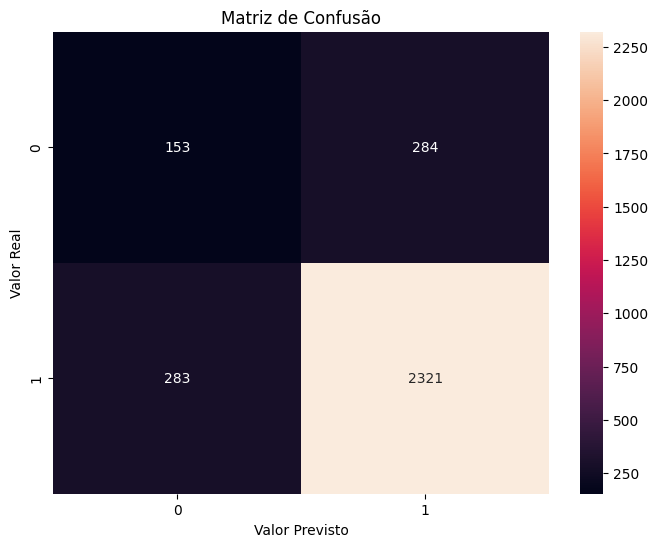


Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Avaliação do Random Forest (Estratégia de preparação: constante):
Acurácia: 0.8570
Precisão: 0.8983
Recall: 0.9393
F1-Score: 0.9183
AUC-ROC: 0.7687


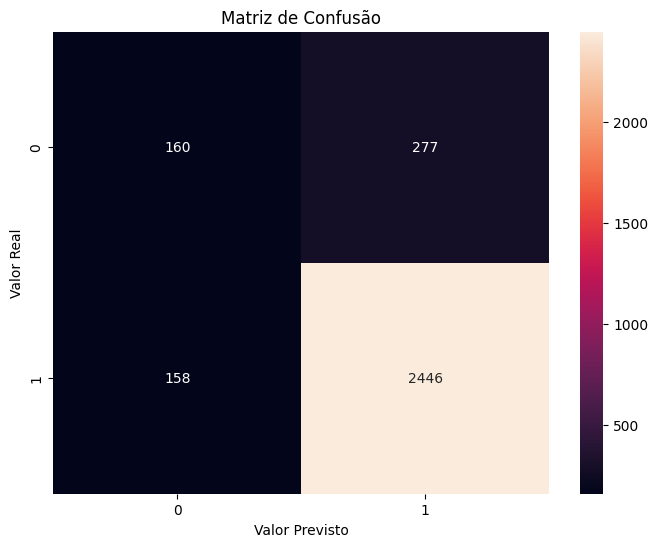


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Avaliação do XGBoost (Estratégia de preparação: constante):
Acurácia: 0.8609
Precisão: 0.8882
Recall: 0.9581
F1-Score: 0.9219
AUC-ROC: 0.7288


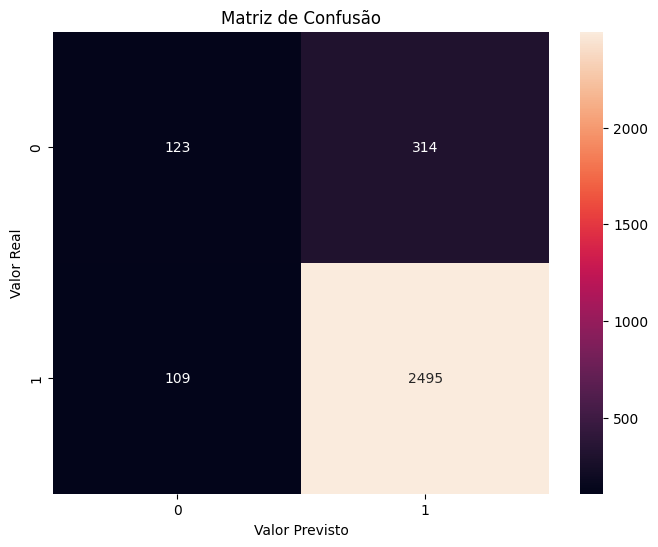


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15550
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

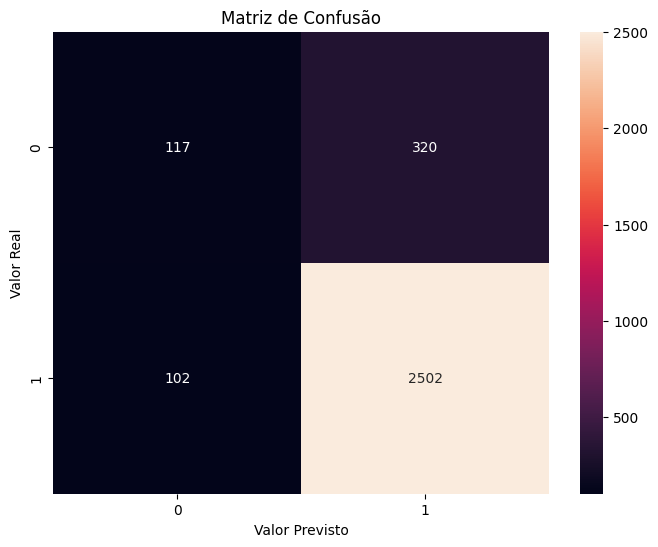


Otimizando e treinando Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Avaliação do Random Forest (Estratégia de preparação: constante_pca):
Acurácia: 0.8310
Precisão: 0.8888
Recall: 0.9174
F1-Score: 0.9029
AUC-ROC: 0.7330


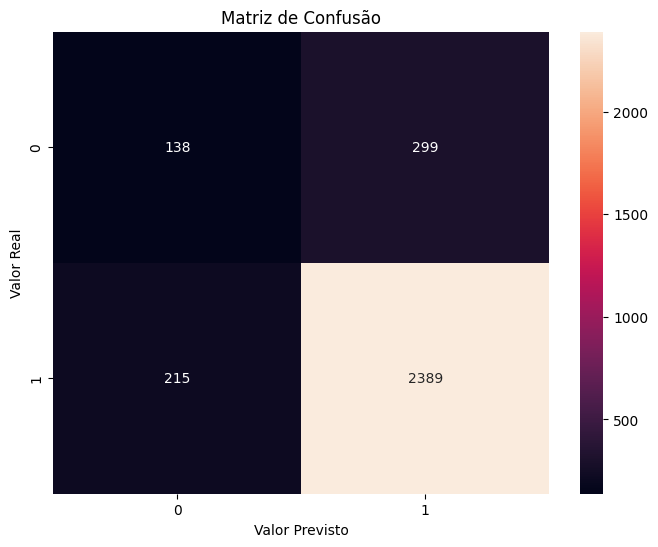


Otimizando e treinando XGBoost...
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}
Avaliação do XGBoost (Estratégia de preparação: constante_pca):
Acurácia: 0.8073
Precisão: 0.8917
Recall: 0.8821
F1-Score: 0.8869
AUC-ROC: 0.6993


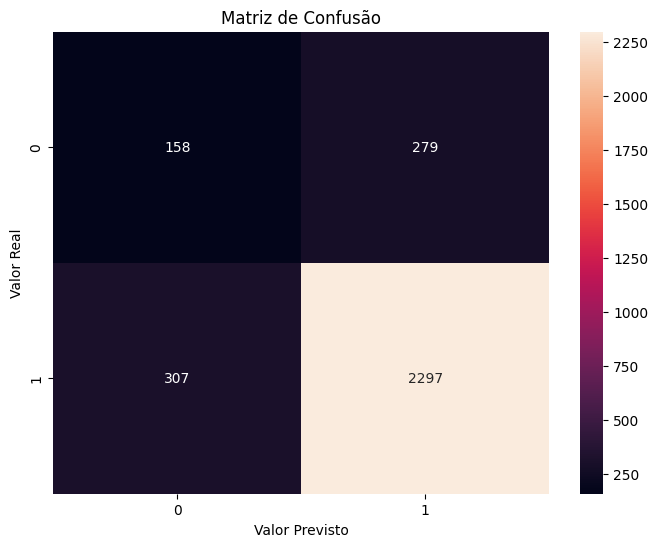


Otimizando e treinando LightGBM...
[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11475
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

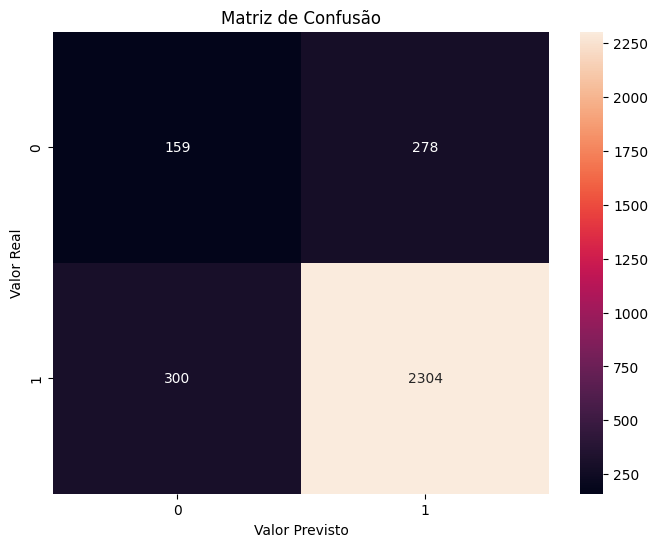


Resultados finais:
{'media': [{'modelo': 'Random Forest', 'estrategia': 'media', 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'Acurácia': 0.8549819138441302, 'Precisão': 0.8863879957127545, 'Recall': 0.9527649769585254, 'F1-Score': 0.9183786785119378, 'AUC-ROC': 0.7485126736898347}, {'modelo': 'XGBoost', 'estrategia': 'media', 'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3, 'Acurácia': 0.8510358434725419, 'Precisão': 0.8845191276367537, 'Recall': 0.9500768049155146, 'F1-Score': 0.9161266432142195, 'AUC-ROC': 0.7188368888560813}, {'modelo': 'LightGBM', 'estrategia': 'media', 'num_leaves': 50, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.1, 'Acurácia': 0.8595856626109832, 'Precisão': 0.883409651285664, 'Recall': 0.9631336405529954, 'F1-Score': 0.9215506154694103, 'AUC-ROC': 0.7401717828934187}], 'media_pca': [{'modelo': 'Random Forest', 'estrategia': 'media_pca', 'n_estimators': 300, 'min_samples_split': 2,

In [35]:
resultados_modelos = {}
modelos_treinados = {}
for estrategia, dados in dados_preparados.items():
    resultados, modelos = treinar_e_avaliar(*dados, estrategia)
    resultados_modelos[estrategia] = resultados
    modelos_treinados[estrategia] = modelos

print("\nResultados finais:")
print(resultados_modelos)

[LightGBM] [Info] Number of positive: 10414, number of negative: 10414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15551
[LightGBM] [Info] Number of data points in the train set: 20828, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

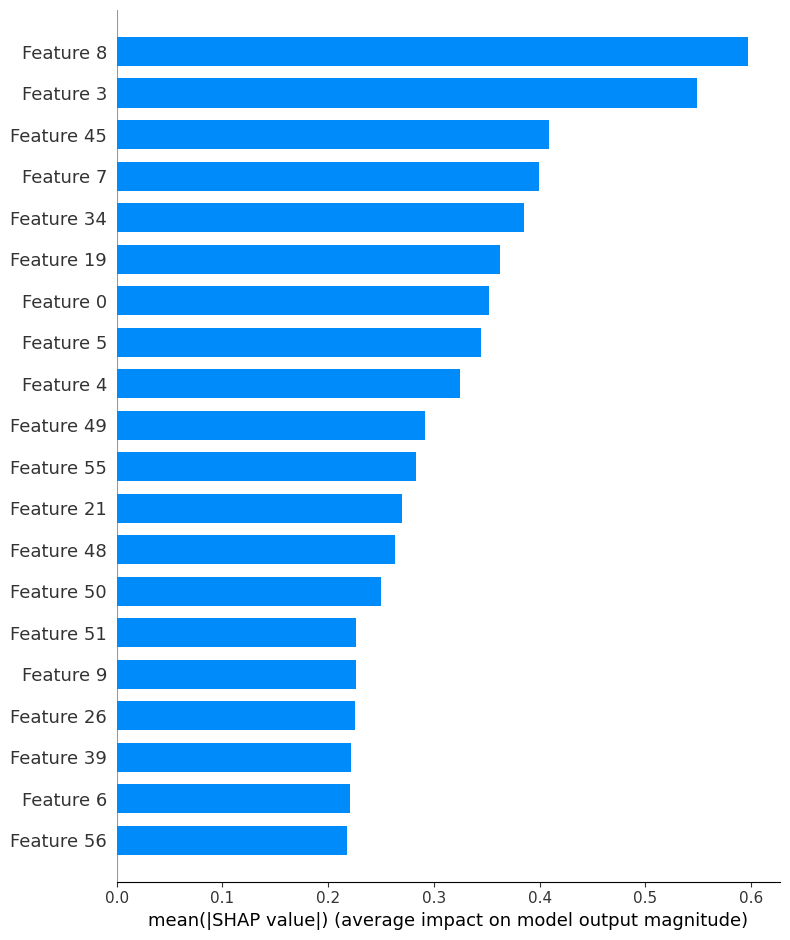

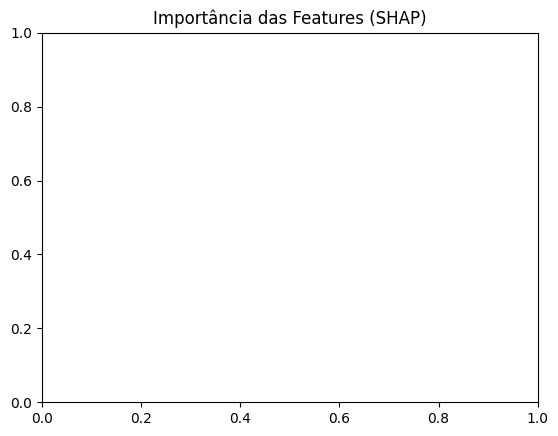

In [36]:
melhor_estrategia, melhor_nome, melhor_modelo, melhor_f1 = selecionar_melhor_modelo(resultados_modelos, dados_preparados)
print(f"\nMelhor modelo: {melhor_nome} com estratégia {melhor_estrategia}")
print(f"F1-Score: {melhor_f1:.4f}")

X_test = dados_preparados[melhor_estrategia][1]
explainer = shap.TreeExplainer(melhor_modelo)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Importância das Features (SHAP)")
plt.show()

In [ ]:
predicoes, modelo_final, y_pred_final = treinar_e_prever_modelo_final(df, test, melhor_modelo, melhor_estrategia, tratar_nulos)

print("\nPrevisões finais geradas e modelo final treinado.")


Testando o modelo final com o conjunto de teste...
Acurácia: 0.7934
Precisão: 0.8291
Recall: 0.9251
F1-Score: 0.8745


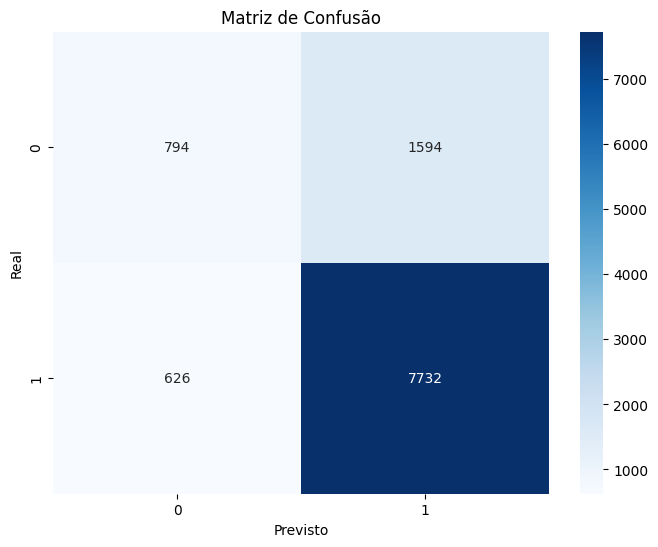


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.56      0.33      0.42      2388
           1       0.83      0.93      0.87      8358

    accuracy                           0.79     10746
   macro avg       0.69      0.63      0.65     10746
weighted avg       0.77      0.79      0.77     10746


Total de amostras: 10746
Acertos: 8526 (79.34%)
Erros: 2220 (20.66%)


In [44]:
avaliar_modelo_final(y_pred_final, test)